In [28]:
import numpy as np 
import matplotlib.pyplot as plt 
from uncertainties import ufloat
import uncertainties.unumpy as unp
from scipy.optimize import curve_fit
import scipy.constants as const
X=[0]


 -----------------------------------Aufgabe a-----------------------------------
a1 = 3.3568302029 ± 0.0669396386
b1 = -1119.1751 ±   100.41860
mu = 178.12224980871306 +- -15.982116209355842 
T_ex = -0.00089+/-0.00008
Reff =  37.6+/-3.4
Abweichung =  -44+/-5

 -----------------------------------Aufgabe b-----------------------------------
R_apt = 5700+/-17
R_ap = 2910.0
p = -48.945717908243495


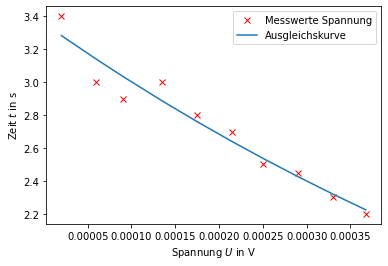

In [29]:


print (f'\n -----------------------------------Aufgabe a-----------------------------------')

t, U = np.genfromtxt('Daten1.txt', unpack = True)

t *= 1#10**(-6)
U *= 0.1#10**(-3) #Zeit wurde in Mikrosekunden gemessen
U1 = abs(U) # da nur die Amplitude untersucht wird, schauen wir uns die einhüllende an

def f(x, a, b):
    return a*np.exp(b*x) # b = -2*np.pi*μ

params1, covarianzmatrix1 = curve_fit(f, t, U1)
error1 = np.sqrt(np.diag(covarianzmatrix1))





plt.plot(t, U, 'rx',label = 'Messwerte Spannung')
plt.plot(t, f(t, *params1), label = 'Ausgleichskurve')
plt.xlabel('Spannung $U$ in V')
plt.ylabel('Zeit $t$ in s')
plt.legend(loc='best')
plt.savefig('spannungsverlauf.pdf')

print('a1 = {:.10f} ± {:.10f}'.format(params1[0], error1[0]))
print('b1 = {:.4f} ±   {:.5f}'.format(params1[1], error1[1]))
print(f'mu = { params1[1]/ (-2*np.pi)} +- {error1[1]/(-2*np.pi)} ')

#print('a2 = {:.10f} ± {:.10f}'.format(params2[0], error2[0]))
#print('b2 = {:.4f} ±   {:.5f}'.format(params2[1], error2[1]))

b = ufloat(params1[1], error1[1])

print(f'T_ex =' , 1/b)

L = ufloat(16.78*1e-3, 0.09*1e-3) #Henry
Rv = ufloat(67.2 , 0.2 )

Reff = - 2*L*b
print('Reff = ',Reff)

print('Abweichung = ',(Reff-Rv)/Rv*100)

print (f'\n -----------------------------------Aufgabe b-----------------------------------')

# diskrepanz da Drähte kabel und co ebenfalls einen wiederstand haben, theorie wert sollte niedriger als der experimentell festgestellte wert sein

R = 2.91
L = ufloat(16.78*1e-3, 0.09*1e-3) #Henry
C = ufloat(2.066*1e-9 , 0.006*1e-9) #Farad

R *= 1e3 # in Ohm

Rt = 2*unp.sqrt(L/C)

print(f'R_apt = {Rt}')
print(f'R_ap = {R}')
print(f'p = {(R-Rt.n)*100/Rt.n}') #Messwerte überprüfen?



 -----------------------------------Aufgabe c-----------------------------------
Untere Frequenz 25224.535031130148
Obere Frequenz 26622.398089978582
6.8
4005+/-25 1397.8630588484339
Güte theoretisch q = 42.41+/-0.18
Güte gemessen q = 121.5+/-0.4
Abweichung= 186.5+/-1.8


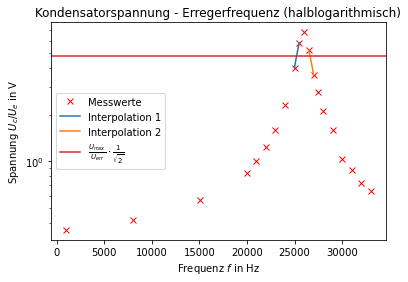

In [67]:
print (f'\n -----------------------------------Aufgabe c-----------------------------------')

f, UC,dt = np.genfromtxt('Daten2.txt', unpack = True)


Ue = 50
YWERT=max(UC/Ue) / np.sqrt(2)
a=8
b=a+1
d=11
e=d+1
m1=((UC[a]/Ue)-(UC[b]/Ue))/(f[a]-f[b])
b1=(UC[a]/Ue)-m1*f[a]
x1=(YWERT-b1)/m1

m2=((UC[d]/Ue)-(UC[e]/Ue))/(f[d]-f[e])
b2=(UC[e]/Ue)-m2*f[e]
x2=(YWERT-b2)/m2
print('Untere Frequenz',x1)
print('Obere Frequenz',x2)
print(max(UC/Ue))
x=np.linspace(f[a],f[b])
y=np.linspace(f[d],f[e])

plt.plot(f, UC/Ue, 'rx', label = 'Messwerte')
plt.plot(x,m1*x+b1,label='Interpolation 1')
plt.plot(y,m2*y+b2,label='Interpolation 2')
#plt.plot(f, k(f, *params), label = 'Ausgleichskurve')
plt.axhline(y = max(UC/Ue) / np.sqrt(2), color = 'tab:red', label = r'$\frac{U_{max}}{U_{err}}\cdot \frac{1}{\sqrt{2}}$' )
plt.xlabel('Frequenz $f$ in Hz')
plt.ylabel('Spannung $U_c/U_e$ in V')
plt.yscale('log')
#plt.xscale('log')
plt.legend(loc ='best')
plt.title('Kondensatorspannung - Erregerfrequenz (halblogarithmisch)')
plt.savefig('frequenz.pdf')

L = ufloat(16.78*1e-3 , 0.09*1e-3) #Henry
Rv = ufloat( 67.2 , 0.2) #Ohm
C = ufloat(2.066*1e-9 , 0.006*1e-9) #Farad

w0 = 1/(unp.sqrt(L*C))
ww = Rv/L

wwg = x2-x1
print(ww,wwg)
print(F'Güte theoretisch q =',  w0/ww )

print(F'Güte gemessen q =',  w0/wwg )
Abweichung=((w0/wwg)-(w0/ww))/(w0/ww)*100
print('Abweichung=',Abweichung)


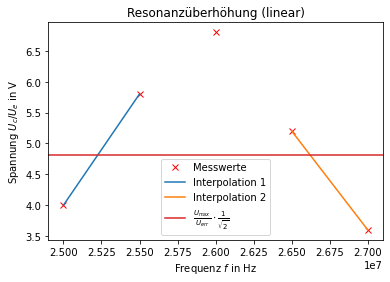

In [40]:
zoom1=8
zoom2=13
Uzoom=X*(zoom2-zoom1)
fzoom=X*(zoom2-zoom1)
g=0
while g < len(Uzoom):
    Uzoom[g]=UC[g+zoom1]/Ue
    fzoom[g]=f[g+zoom1]
    g=g+1

plt.plot(fzoom,Uzoom,'rx',label='Messwerte')
plt.plot(x,m1*x+b1,label='Interpolation 1')
plt.plot(y,m2*y+b2,label='Interpolation 2')
plt.axhline(y = max(UC/Ue) / np.sqrt(2), color = 'tab:red', label = r'$\frac{U_{max}}{U_{err}}\cdot \frac{1}{\sqrt{2}}$' )
plt.xlabel('Frequenz $f$ in Hz')
plt.ylabel('Spannung $U_c/U_e$ in V' )
plt.title('Resonanzüberhöhung (linear)')
plt.legend(loc='best')
plt.savefig('resonanzuberhohung.pdf')

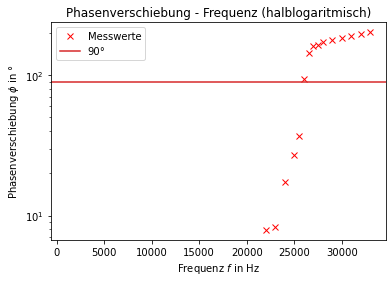

In [73]:
 
 h=0
 phi=X*len(f)
 phirad=X*len(f)
 while h < len(phi):   
    phi[h]=f[h]*360*(dt[h])
    phirad[h]=f[h]*2*const.pi*(dt[h])
    h=h+1
plt.plot(f,phi,'rx',label='Messwerte')
plt.axhline(y = 90, color = 'tab:red', label = '90°' )
plt.yscale('log')
plt.xlabel('Frequenz $f$ in Hz')
plt.ylabel('Phasenverschiebung $\phi$ in °')
plt.title('Phasenverschiebung - Frequenz (halblogaritmisch)')
plt.legend(loc='best')
plt.savefig('phasenverschiebung.pdf')


xwert 45= 25572.784810126584
xwert 90= 25968.35443037975
xwert 135= 26418.18181818182


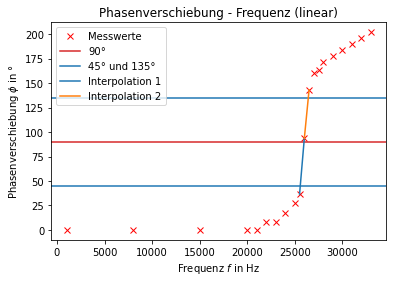

In [88]:
i=9
j=i+1
k=10
l=k+1
YWERT2=45
YWERT3=90
YWERT4=135
m3=((phi[i]-phi[j])/(f[i]-f[j]))
b3=(phi[i]-(m3*f[i]))
x3=(YWERT2-b3)/m3
x5=(YWERT3-b3)/m3
m4=((phi[k]-phi[l])/(f[k]-f[l]))
b4=(phi[k]-(m4*f[k]))
x4=(YWERT4-b4)/m4

xx=np.linspace(f[i],f[j])
yy=np.linspace(f[k],f[l])
plt.plot(f,phi,'rx',label='Messwerte')
plt.axhline(y = 90, color = 'tab:red', label = '90°' )
plt.axhline(y = 45, color = 'tab:blue', label = '45° und 135°' )
plt.axhline(y = 135, color = 'tab:blue' )
plt.plot(xx,m3*xx+b3,label='Interpolation 1')
plt.plot(yy,m4*yy+b4,label='Interpolation 2')
#plt.yscale('log')
plt.xlabel('Frequenz $f$ in Hz')
plt.ylabel('Phasenverschiebung $\phi$ in °')
plt.title('Phasenverschiebung - Frequenz (linear)')
plt.legend(loc='best')
plt.savefig('phasenverschiebunglin.pdf')
print('xwert 45=',x3)
print('xwert 90=',x5)
print('xwert 135=',x4)

In [104]:
omega1=(R/(2*L))+unp.sqrt((R**2/(4*L**2))+(1/(L*C)))
omega2=unp.sqrt((R**2/(4*L**2))+(1/(L*C)))-(R/(2*L))
omegares=unp.sqrt((1/(L*C))-(R**2/(2*L**2)))
print('omega 1',omega1)
print('omega 2',omega2)
print('omega res',omegares)


omega 1 (2.774+/-0.011)e+05
omega 2 (1.0398+/-0.0027)e+05
omega res (1.175+/-0.004)e+05


In [107]:
abw1=(x3-omega1)/omega1
abw90=(x5-omegares)/omegares
abw2=(x4-omega2)/omega2

print('abw 1',abw1*100)
print('abw 90',abw2*100)
print('abw 2',abw90*100)

abw 1 -90.78+/-0.04
abw 90 -74.59+/-0.07
abw 2 -77.90+/-0.07
